# Análise dos perfis da ECT com KMeans

In [0]:
 # Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# importing the dataset

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dados_ect.csv to dados_ect.csv
User uploaded file "dados_ect.csv" with length 159532 bytes


In [0]:
dados = pd.read_csv("dados_ect.csv")

In [0]:
dados.head()

,discente,periodoano,media_c1,faltas_c1,media_pre,faltas_pre,media_vga,faltas_vga,descricao_c3
0,3d688dbe74a84992ce43181e08c0f295,20151,0.0,0.0,0.0,66.0,0.1,30.0,NÃO PRESENTE
1,6c4acceb9b1288b61d893dc1b5005764,20151,0.0,0.0,5.3,16.0,3.1,0.0,NÃO PRESENTE
2,bb67c2ca87d0e1fcf027b2f0f6df4221,20151,8.5,0.0,9.7,16.0,6.3,0.0,NÃO PRESENTE
3,9897eefc366f1f546e5340390c3df0cd,20151,1.3,0.0,5.0,14.0,1.2,0.0,NÃO PRESENTE
4,859abe9fcb5769f73f54cba6592b81af,20151,1.7,0.0,5.3,2.0,1.3,0.0,NÃO PRESENTE


In [0]:
X = dados.iloc[:, 2:8].values
print(X[:10])

[[ 0.   0.   0.  66.   0.1 30. ]
 [ 0.   0.   5.3 16.   3.1  0. ]
 [ 8.5  0.   9.7 16.   6.3  0. ]
 [ 1.3  0.   5.  14.   1.2  0. ]
 [ 1.7  0.   5.3  2.   1.3  0. ]
 [ 8.   0.   6.8  0.   5.3  0. ]
 [ 7.2  0.   6.3  4.   6.7  0. ]
 [10.   0.   7.2  0.   6.5  0. ]
 [ 7.8  0.  10.   0.   6.8  0. ]
 [10.   0.   8.8  4.   8.1  0. ]]


In [0]:
# Fitting K-Means to the dataset

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'random', random_state = 1)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans[:10])

print(y_kmeans == 0)

[1 1 1 1 1 1 1 1 1 1]
[False False False ... False False False]


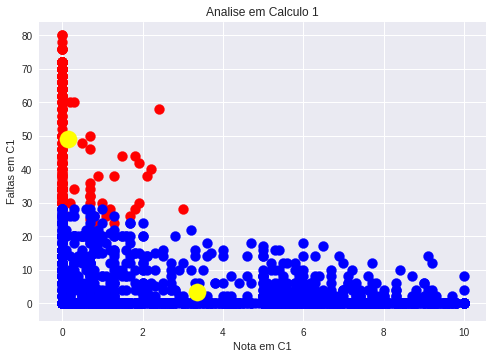

In [0]:
# Visualising the clusters
#plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'red', label = 'Data')

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Analise em Calculo 1')
plt.xlabel('Nota em C1')
plt.ylabel('Faltas em C1')
plt.show()

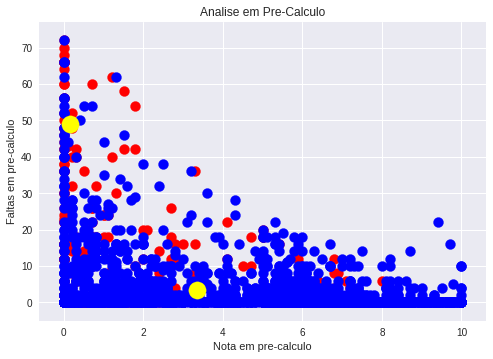

In [0]:
# Visualising the clusters
#plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'red', label = 'Data')

plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Analise em Pre-Calculo')
plt.xlabel('Nota em pre-calculo')
plt.ylabel('Faltas em pre-calculo')
plt.show()

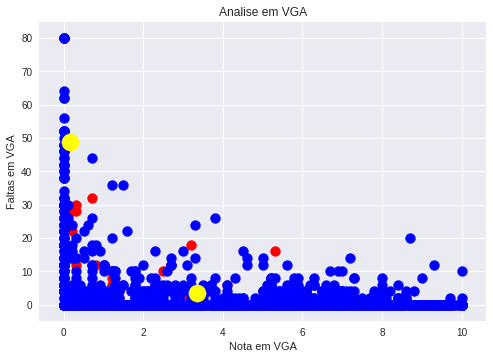

In [0]:
# Visualising the clusters
#plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'red', label = 'Data')

plt.scatter(X[y_kmeans == 0, 4], X[y_kmeans == 0, 5], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 4], X[y_kmeans == 1, 5], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Analise em VGA')
plt.xlabel('Nota em VGA')
plt.ylabel('Faltas em VGA')
plt.show()

# Analisando apenas as Notas

In [0]:
x_notas = dados.iloc[:, 2:8:2].values
print(x_notas[:10])

[[ 0.   0.   0.1]
 [ 0.   5.3  3.1]
 [ 8.5  9.7  6.3]
 [ 1.3  5.   1.2]
 [ 1.7  5.3  1.3]
 [ 8.   6.8  5.3]
 [ 7.2  6.3  6.7]
 [10.   7.2  6.5]
 [ 7.8 10.   6.8]
 [10.   8.8  8.1]]


In [0]:
# Fitting K-Means to the dataset

from sklearn.cluster import KMeans

kmeans_notas = KMeans(n_clusters = 2, init = 'random', random_state = 1)
notas_kmeans = kmeans_notas.fit_predict(x_notas)

print(notas_kmeans[:10])

print(notas_kmeans == 0)

[1 1 0 1 1 0 0 0 0 0]
[False False  True ...  True False False]


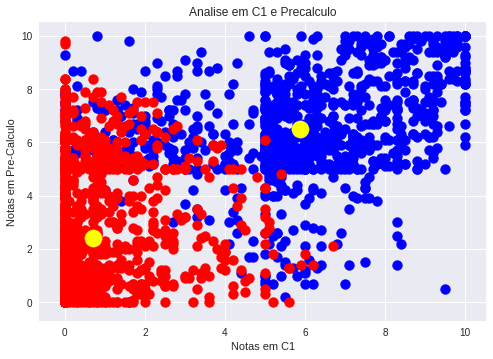

In [0]:
# Visualising the clusters
#plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'red', label = 'Data')

plt.scatter(x_notas[notas_kmeans == 0, 0], x_notas[notas_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x_notas[notas_kmeans == 1, 0], x_notas[notas_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans_notas.cluster_centers_[:, 0], kmeans_notas.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Analise em C1 e Precalculo')
plt.xlabel('Notas em C1')
plt.ylabel('Notas em Pre-Calculo')
plt.show()